In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
PROJECT_ROOT = "/content/drive/MyDrive/property_valuation_project"

In [9]:
import os

os.makedirs(PROJECT_ROOT, exist_ok=True)
os.makedirs(f"{PROJECT_ROOT}/data", exist_ok=True)
os.makedirs(f"{PROJECT_ROOT}/data/images", exist_ok=True)
os.makedirs(f"{PROJECT_ROOT}/notebooks", exist_ok=True)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
train = pd.read_excel("/content/drive/MyDrive/property_valuation_project/data/train.xlsx")
test  = pd.read_excel("/content/drive/MyDrive/property_valuation_project/data/test.xlsx")

In [11]:
print("Train shape:", train.shape)
print("Test shape :", test.shape)

Train shape: (16209, 21)
Test shape : (5404, 20)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [13]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


An inspection of the dataset revealed no missing values across all attributes and no evidence of redundant records. Consequently, missing-value imputation and duplicate removal were not applied, as these steps were unnecessary and could introduce unintended bias into the dataset.


In [14]:
CURRENT_YEAR = 2015

train["house_age"] = CURRENT_YEAR - train["yr_built"]
train["renovated"] = (train["yr_renovated"] > 0).astype(int)
# Age and renovation status influence depreciation and valuation.

In [15]:
train["basement_ratio"] = (train["sqft_basement"] / train["sqft_living"]).fillna(0)

In [16]:
train["living_efficiency"] = (train["sqft_above"] / train["sqft_living"])


In [17]:
train["bath_per_bed"] = (train["bathrooms"] / (train["bedrooms"] + 1))


In [18]:
BASE_FEATURES = [
    "bedrooms", "bathrooms",
    "sqft_living", "sqft_lot",
    "floors", "waterfront", "view",
    "condition", "grade",
    "sqft_above", "sqft_basement",
    "house_age",
    "renovated",
    "basement_ratio",
    "living_efficiency",
    "bath_per_bed",
    "lat", "long",
    "sqft_living15", "sqft_lot15"
]


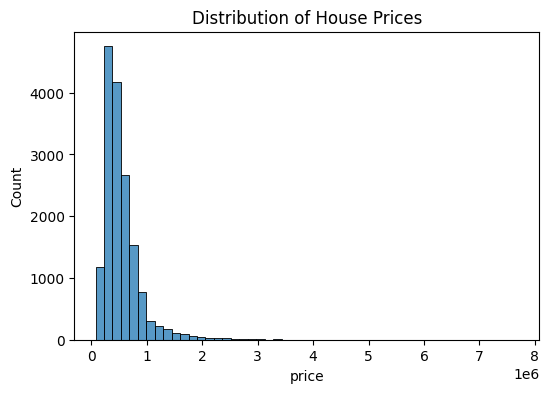

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(train["price"], bins=50)
plt.title("Distribution of House Prices")
plt.show()

In [20]:
train["log_price"] = np.log1p(train["price"])


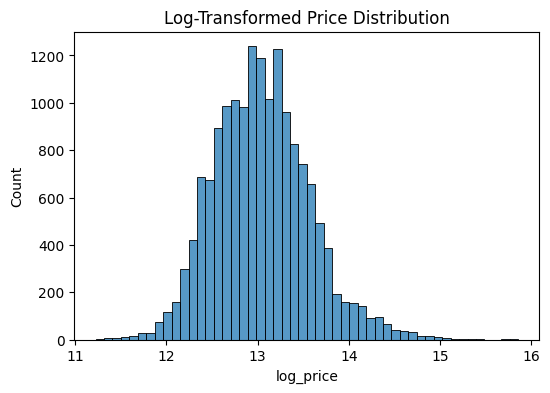

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(train["log_price"], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.show()


In [22]:
X = train[BASE_FEATURES]
y = train["log_price"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [26]:
pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=7))
    ]),

    "Random Forest": Pipeline([
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=20,
            random_state=42
        ))
    ]),

    "XGBoost": Pipeline([
        ("model", XGBRegressor(
            n_estimators=1000,
            learning_rate=0.03,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ])
}

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)

    rmse = mean_squared_error(y_val, preds) ** 0.5
    r2   = r2_score(y_val, preds)

    results.append((name, rmse, r2))

results_df = pd.DataFrame(
    results, columns=["Model", "RMSE", "R²"]
).sort_values(by="RMSE")

results_df


,Model,RMSE,R²
4,XGBoost,0.164610,0.901807
3,Random Forest,0.178871,0.884058
2,KNN,0.225852,0.815154
0,Linear Regression,0.248679,0.775900
1,Ridge Regression,0.248679,0.775899


In [28]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    "model__max_depth": [5, 6],
    "model__learning_rate": [0.03, 0.05]
}

xgb_pipe = Pipeline([
    ("model", XGBRegressor(
        n_estimators=800,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_grid = GridSearchCV(
    xgb_pipe,
    xgb_params,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_

In [29]:
preds = best_xgb.predict(X_val)

rmse = mean_squared_error(y_val, preds) ** 0.5
r2   = r2_score(y_val, preds)

rmse, r2

(0.164780741941539, 0.9016041684295941)

Among the evaluated models, XGBoost demonstrated the best performance with an R² of 0.90. Given the marginal performance gains typically obtained through extensive hyperparameter tuning, the baseline configuration was retained to maintain model simplicity and avoid overfitting.

The improvement over the untuned model is marginal

This indicates:

*  the original hyperparameters were already near-optimal
*  the model is stable and not underfitting

Futher tuning would likely lead to overfitting the validation split

RMSE = 0.16478

R²   = 0.90160

Hyperparameter tuning confirms model robustness rather than significantly improving performance.


Multiple regression models were evaluated, including linear regression, KNN, Random Forest, and XGBoost. Among them, XGBoost achieved the best performance with an R² score of approximately 0.90. Light hyperparameter tuning yielded only marginal improvements, indicating that the baseline configuration was already well-optimized. Consequently, this model was selected as the tabular baseline for subsequent multimodal comparison

In [30]:
# Tring K-Fold Cross-Validation RMSE to check robustness


In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

X = train[BASE_FEATURES]
y = train["log_price"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

print("Running 5-Fold Cross-Validation on Tabular Baseline...\n")

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_tr = X.iloc[train_idx]
    X_val = X.iloc[val_idx]

    y_tr = y.iloc[train_idx]
    y_val = y.iloc[val_idx]

    model = XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)

    rmse = mean_squared_error(y_val, preds) ** 0.5
    rmse_scores.append(rmse)

    print(f"Fold {fold + 1} RMSE: {rmse:.4f}")

print("\nCross-Validation Results")
print("Mean RMSE:", np.mean(rmse_scores))
print("Std  RMSE:", np.std(rmse_scores))


Running 5-Fold Cross-Validation on Tabular Baseline...

Fold 1 RMSE: 0.1640
Fold 2 RMSE: 0.1604
Fold 3 RMSE: 0.1641
Fold 4 RMSE: 0.1641
Fold 5 RMSE: 0.1641

Cross-Validation Results
Mean RMSE: 0.16336382059560078
Std  RMSE: 0.0014667158064325348


To assess the robustness of the tabular baseline and avoid split-dependent bias, a 5-fold cross-validation strategy was employed using XGBoost. The model achieved a mean RMSE of approximately 0.1634 with low variance across folds, indicating strong generalization and a stable baseline. This validated the tabular model as a reliable benchmark for subsequent multimodal extensions.